<a href="https://colab.research.google.com/github/hakidaova/MLF/blob/main/MLF_cv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. First import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. prepare data
# In this part, the task would be to prepade our dataset, basically it is the logic table for XOR function

X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [4]:
# 2. Creating the model
# To create a model of NN that is in the picture above, run the following cell

model = Sequential()
model.add(InputLayer(input_shape=(2,))) # define input layer with 2 features
model.add(Dense(2, activation='sigmoid')) # hidden layer (2 neurons), too many means the model starts to memorize inputs, too little means the model doesnt learn enough
model.add(Dense(1, activation='sigmoid')) # output layer (1 neuron)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 3. Compile the model
# To compile yor model run:

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) # learning rate - "step accuracy"
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [6]:
# 4. Model training
# In the lecture, we talked about training the Multi-layer perceptron. The training process consists of the following steps:

# Weight initialization
# Forward Propagation
# Compute Loss
# Backpropagation
# Update Weights
# Repeat 2->6 until maximum epochs are reached
# When training a machine learning model, the training data is usually divided into batches (parts), and the model updates its weights after processing each batch. The batch size determines how many training examples are included in each batch.

# For example, we have 10,000 training examples and a batch size of 100. In this case, the training data would be divided into 100 batches of 100 examples each. During training, the model would process each batch, calculate the loss or error, and update its weights based on the average of the errors in that batch. In other words, if we batch equal to 1. we will update the weights 10 000 times. If we have batch size == 100, we will update the weights only 100 times

# To train your model, run the following line of the code:

history = model.fit(X, y, epochs=3000, batch_size=1500, verbose=0) # batch updates the weight after n inputs

In [7]:
# 5. Model evaluation
# Out training process is finished. To evaluate the performance of our model on test data, tun the following cell of the code:

loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print(loss)

Accuracy: 100.00
0.12194377183914185


In [8]:
# 6. Model predictions

for id_x, data_sample in enumerate(X):
  data_sample = np.array(data_sample).reshape(1, 2)
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Data sample is [[0 0]], prediction from model [[0.11499227]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 2))',)
  warnings.warn(msg)


Data sample is [[0 1]], prediction from model [[0.84312034]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Data sample is [[1 0]], prediction from model [[0.9079884]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Data sample is [[1 1]], prediction from model [[0.09375621]], ground_truth 0


Text(0, 0.5, 'loss')

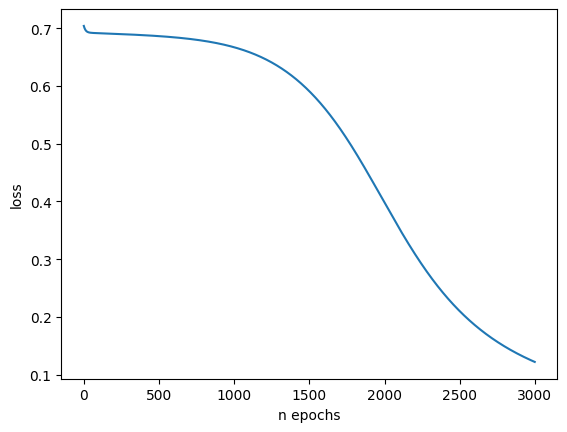

In [9]:
# 7. Display loss function during the training process and acuracy

plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [11]:
# Exercise 2 - Congressional Voting Data
# In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is republican or democrat based on voting results. We would follow the general machine learning steps that were described in the lecture.


import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

path_to_dataset = 'drive/MyDrive/MLF/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

pd_dataset

Mounted at /content/drive


,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [12]:
def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [13]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

# 3. Data examination
# The task would be to examine the dataset. Check:

# Is it a classification or regression task? classification - we have to categorize
# How many data samples do we have? 435
# How many features do we have? 16
# What data types do we have in our dataset? boolean
# Are there any missing values? yes
# How many labels do we have? 2

In [14]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,?,?,?,n,n,n,y,y,y,y,n,n,y,n,y,y
344,y,n,y,n,?,n,y,y,y,y,n,y,n,?,y,y
345,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


# 4. Data preprocessing
When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set.

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)

* Replace missing values with any data imputation
technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
* Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding

The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [15]:
x_train.replace('?', np.nan, inplace=True)
x_train.fillna(x_train.mode().iloc[0], inplace=True) # fills NaN values in the x_train with the mode (most frequent value) of the corresponding column
x_train

#one-hot encoding
x = pd.get_dummies(x_train) # categorical columns in x_train are converted into binary (0/1) columns using one-hot encoding
x

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
1,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
2,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False
3,True,False,False,True,False,True,True,False,True,False,...,True,False,False,True,True,False,True,False,False,True
4,True,False,False,True,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,True,False,True,False,False,True,True,False,True,False,...,True,False,False,True,True,False,False,True,False,True
344,False,True,True,False,False,True,True,False,True,False,...,False,True,True,False,False,True,False,True,False,True
345,True,False,True,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
346,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True


In [16]:
y = y_train.replace({'republican':1, 'democrat':0})
y

<ipython-input-16-8919ae603e91>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y_train.replace({'republican':1, 'democrat':0})


,Class Name
0,1
1,1
2,0
3,0
4,0
...,...
343,0
344,0
345,0
346,1


In [17]:
model = Sequential()
model.add(Dense(8, input_shape=(x.shape[1],), activation='relu')) #hidden layers ... 16*n,
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

history = model.fit(x_train, y_train,
                    epochs = 40 ,
                    batch_size = 4,
                    verbose = 1,
                    validation_data = (x_val, y_val))

Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8050 - loss: 0.4096 - val_accuracy: 0.5714 - val_loss: 0.5421
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9169 - loss: 0.2374 - val_accuracy: 0.9714 - val_loss: 0.0705
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9339 - loss: 0.1608 - val_accuracy: 0.9857 - val_loss: 0.0626
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9635 - loss: 0.1303 - val_accuracy: 0.9857 - val_loss: 0.0542
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9301 - loss: 0.1411 - val_accuracy: 0.9857 - val_loss: 0.0548
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.0916 - val_accuracy: 0.9857 - val_loss: 0.0575
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.0818 - val_accuracy: 0.9857 - val_loss: 0.0729
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9544 - loss: 0.1263 - val_accuracy: 0.9857 - val_loss

In [20]:
x_test.replace('?', np.nan, inplace=True)
x_test.fillna(x_test.mode().iloc[0], inplace=True)
x_test

x1 = pd.get_dummies(x_val) # categorical columns in x_train are converted into binary (0/1) columns using one-hot encoding
x1

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
203,False,True,True,False,False,True,True,False,True,False,...,True,False,True,False,False,True,False,True,False,True
276,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
95,True,False,True,False,True,False,False,True,False,True,...,False,True,True,False,False,True,True,False,False,True
147,False,True,True,False,False,True,True,False,True,False,...,True,False,True,False,True,False,False,True,False,True
295,False,True,False,True,False,True,True,False,True,False,...,True,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,True,False,True,False,False,True
292,False,True,False,True,False,True,True,False,False,True,...,True,False,True,False,True,False,False,True,False,True
22,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,True,False
146,False,True,True,False,True,False,False,True,False,True,...,False,True,True,False,False,True,True,False,False,True


In [21]:
y1 = y_val.replace({'republican':1, 'democrat':0})
y1

,Class Name
203,0
276,1
95,1
147,0
295,0
...,...
102,1
292,0
22,1
146,1


In [22]:
loss, accuracy = model.evaluate(x1, y1, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss*100))

Accuracy: 97.14
Loss: 8.57


Text(0, 0.5, 'loss')

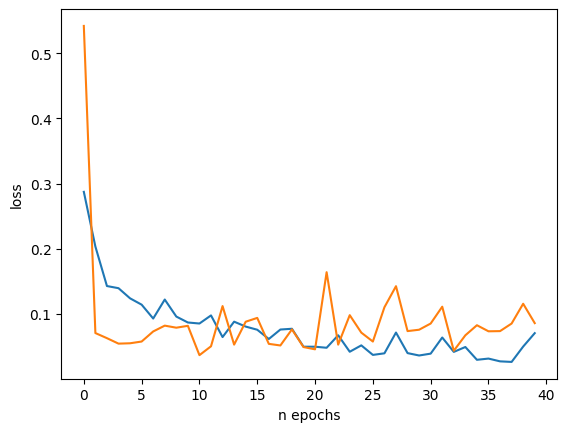

In [23]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

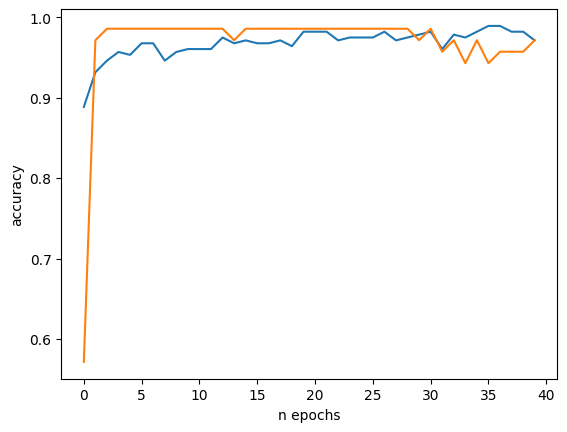

In [24]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('n epochs')
plt.ylabel('accuracy')